In [ ]:
pip install tensorflow==2.15

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
  Attempting uninstall: tensorb

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git
!pip install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-wn_5ocv_
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-wn_5ocv_
  Resolved https://github.com/keras-team/keras-tuner.git to commit 417e5b5e8df924d428a3c64007f3ed47bd4c7026
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-

In [ ]:
import tensorflow as tf
import autokeras as ak
import pandas as pd
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
import gensim

In [ ]:
import os

In [ ]:
os.chdir( "/content/drive/My Drive/PES_MTech_inperson/S3_S4")

In [ ]:
!ls

 case_study_part-1_TF-IDF_CML.ipynb  'Copy of case_study_part-5_Glove_LSTM.ipynb'
 case_study_part-2_Glove_CML.ipynb    glove6B300d.txt
 case_study_part-3_Glove_MLP.ipynb    GoogleNews-vectors-negative300.bin
 case_study_part-4_w2v_MLP.ipynb      logs.log
 case_study_part-5_Glove_LSTM.ipynb   model.png
 complaints.csv


### Load the dataset from the disk

In [ ]:
import pandas as pd
df = pd.read_csv('complaints.csv') # We are taking less rows for faster execution
df.head()

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit reporting
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
2,An account on my credit report has a mistaken ...,Credit reporting
3,This company refuses to provide me verificatio...,Debt collection
4,This complaint is in regards to Square Two Fin...,Debt collection


In [ ]:
df.shape

(179776, 2)

In [ ]:
df['Product'].value_counts()

,count
Product,
Debt collection,43946
Mortgage,34576
Credit reporting,31589
Credit card,18845
Bank account or service,14892
Student loan,12047
Consumer Loan,9486
"Credit reporting, credit repair services, or other personal consumer reports",6118
Payday loan,1750


<Axes: xlabel='Product'>

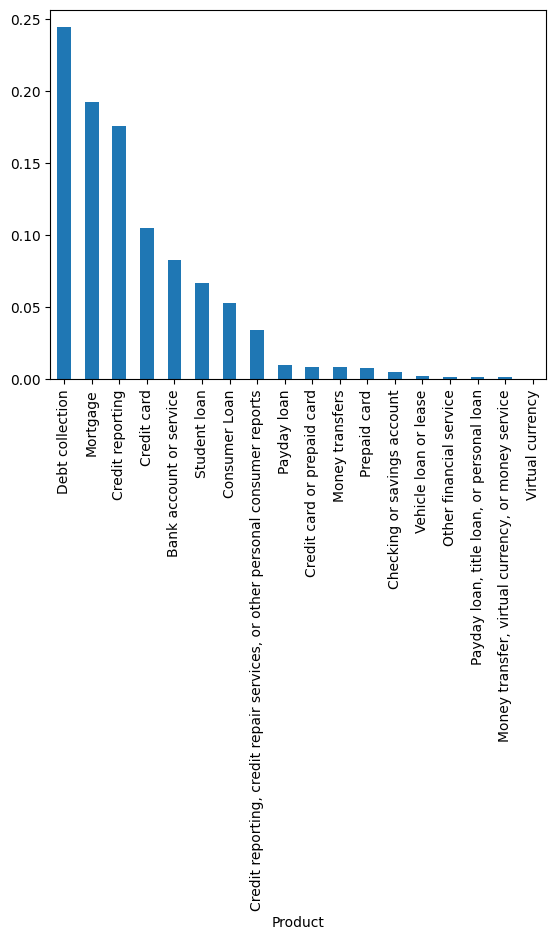

In [ ]:
df['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
stratify_column = 'Product'

In [ ]:
df_prod, _=train_test_split(df, test_size=0.5, stratify=df[stratify_column], random_state=42)

In [ ]:
df.shape

(179776, 2)

In [ ]:
df_prod.shape

(89888, 2)

<Axes: xlabel='Product'>

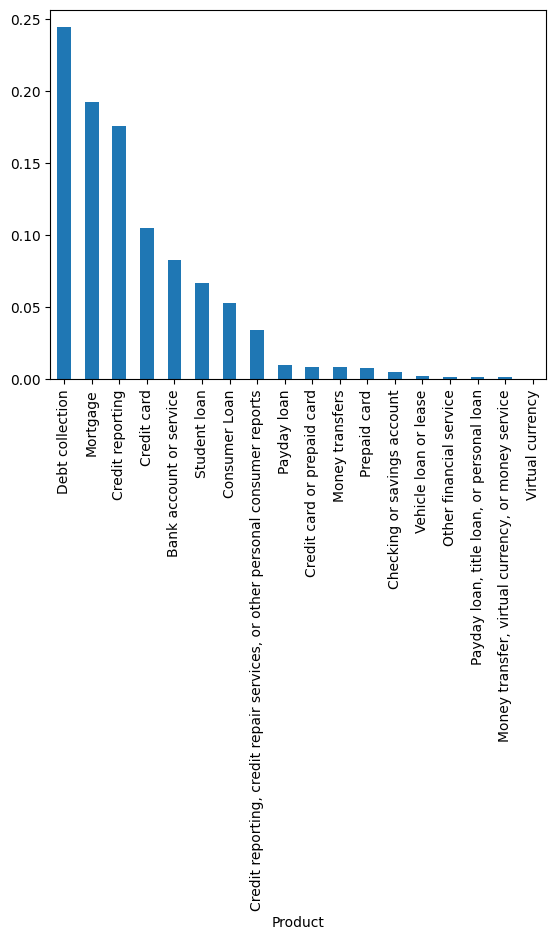

In [ ]:
df_prod['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
threshold=0.05

In [ ]:
values_below_threshold = df_prod['Product'].value_counts(normalize=True)
values_below_threshold = values_below_threshold[df_prod['Product'].value_counts(normalize=True) <=threshold ].index.tolist()

In [ ]:
values_below_threshold

['Credit reporting, credit repair services, or other personal consumer reports',
 'Payday loan',
 'Credit card or prepaid card',
 'Money transfers',
 'Prepaid card',
 'Checking or savings account',
 'Vehicle loan or lease',
 'Other financial service',
 'Payday loan, title loan, or personal loan',
 'Money transfer, virtual currency, or money service',
 'Virtual currency']

In [ ]:
len(values_below_threshold)

11

In [ ]:
df_prod['Product'] = df_prod['Product'].apply(lambda x: 'Other' if x in values_below_threshold else x)

<Axes: xlabel='Product'>

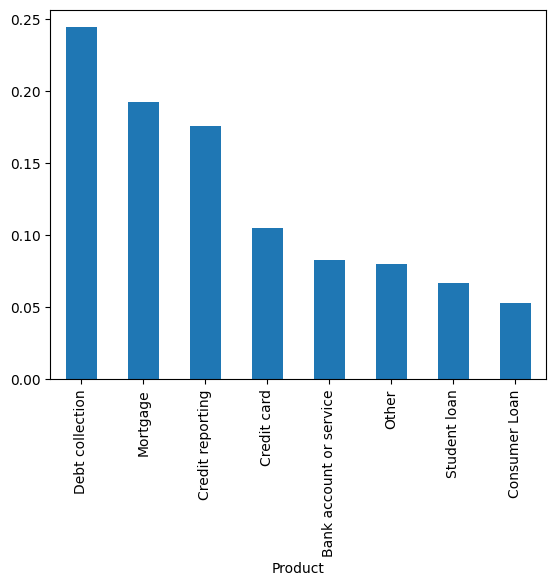

In [ ]:
df_prod['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df_prod.isnull().sum()

,0
Consumer complaint narrative,0
Product,0


### Tokenizer
Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences.

In [ ]:
def cleanup(text):

    #words = comp.lower().split()
    alphabets_only = re.sub("[^a-zA-Z\s]", "", text) # Remove non-alphabetic characters
    alphabets_only = re.sub("\d+", "", alphabets_only)  # Remove digits explicitly
    alphabets_only = re.sub("\s+", " ", alphabets_only).strip() # Remove extra spaces
    return alphabets_only.lower()

In [ ]:
df_prod['Consumer complaint narrative']=df_prod['Consumer complaint narrative'].apply(cleanup)

### Vocabulary
Extracing all the unique words from the dataset

In [ ]:
def complaint_to_words(text) -> list:
    return text.split()

In [ ]:
all_words = list()
for comp in df_prod['Consumer complaint narrative']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [ ]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 70695


In [ ]:
print('Complaint\n', df_prod['Consumer complaint narrative'].iloc[10], '\n')
print('Tokens\n', complaint_to_words(df_prod['Consumer complaint narrative'].iloc[10]))

Complaint
 first federal credit account numbers xxxx xxxxxxxxxxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx phone xxxx attention to dispute department dear sir or madam i am a victim of identity theft an identity thief used my personal information without my permission to open an account several account in my name this debt is not mine i have enclosed proof of my identity and a copy of my identity theft report in accordance with the fair debt collection practices act i am asking you to stop collection proceedings against me and stop communicating with me about this debt except as the fair credit reporting act allows i also ask that you first federal credit or any company associate with this account xxxx and tell them the debt is the result of identity theft i have enclosed a copy of the federal trade commission s police report notice to furnishers of information it explains your responsibilities under the fair credit reporting act fcra the fcra requires that debt collectors give an ident

Conventional ML models with TF_IDF vectorization

In [ ]:
df_prod.sample(10)

,Consumer complaint narrative,Product
140089,i bought a toyota camery xxxx on xxxx from xxx...,Consumer Loan
49166,i have filed a few other complaints related to...,Consumer Loan
161263,i have a text alert set up on my checking acco...,Bank account or service
50361,i filed a dispute with xxxx weeks ago against ...,Credit reporting
86261,this is a third party collector to who i told ...,Debt collection
40775,i have sent equifax several letters over month...,Credit reporting
16868,i requested on xxxx for capital one to have my...,Credit card
38782,loan application with lakeview loan servicing ...,Mortgage
9238,i would like to have my loan dismissed my prev...,Student loan
3159,i had xxxx medical debts with central financia...,Debt collection


In [ ]:
df_train=df_prod.sample(frac=0.9,random_state=50)
df_test=df_prod.drop(df_train.index)

In [ ]:
def average_word2vec_embedding(text, model):
  tokens=text.split()
  # Filter tokens present in the Word2Vec model's vocabulary
  valid_tokens = [token for token in tokens if token in model.key_to_index]
  if not valid_tokens:
    return np.zeros(model.vector_size)
  embeddings = [model[token] for token in valid_tokens]
  avg_embedding = np.mean(embeddings, axis=0)
  return avg_embedding

In [ ]:
  model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print (df_prod['Consumer complaint narrative'][:5].apply(lambda x: average_word2vec_embedding(x, model)))

121878    [-0.0060521583, -0.0002492048, 0.052474022, 0....
125261    [-0.0051746545, 0.030248648, 0.022662964, 0.09...
23818     [-0.0044399165, -0.003153263, 0.0077986596, 0....
79241     [-0.009469243, 0.036180142, 0.03243682, 0.0730...
147039    [-0.012542834, 0.016971316, 0.035435323, 0.055...
Name: Consumer complaint narrative, dtype: object


#### Taking average of all word embeddings in a sentence to generate the sentence representation.

In [ ]:
df_prod['W2V_Encoding'] = df_prod['Consumer complaint narrative'].apply(lambda x: average_word2vec_embedding(x, model))

In [ ]:
encoded_df = pd.DataFrame(df_prod['W2V_Encoding'].tolist(), index=df_prod.index)
encoded_df['Product'] = df_prod['Product'].values

In [ ]:
encoded_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Product
13192,0.005005,-0.018810,0.068691,0.040401,-0.059743,-0.011345,0.037374,-0.027167,0.056455,0.034439,...,0.069091,-0.056195,-0.007631,-0.038992,0.004966,0.009523,-0.053836,0.034693,-0.043272,Debt collection
68567,0.021383,0.025172,0.036234,0.083219,-0.030249,-0.036932,0.046953,-0.055016,0.094437,0.055126,...,0.068054,-0.093967,0.016297,-0.011273,0.022942,-0.034357,-0.016648,-0.013195,-0.047927,Mortgage
126559,-0.017809,0.025101,0.058953,0.042423,-0.022347,-0.029945,0.016321,-0.057734,0.063568,0.058210,...,0.038038,-0.066724,0.001217,-0.008837,-0.015251,-0.005949,-0.045556,0.001484,-0.064967,Bank account or service
174179,-0.057872,-0.022062,0.099731,0.122450,-0.046459,-0.047722,-0.046708,-0.029893,0.146563,0.100803,...,0.091459,-0.074253,-0.037429,0.009295,-0.024293,-0.056217,-0.031662,-0.085930,-0.045311,Other
131329,-0.006809,0.014267,0.010637,0.084003,-0.032822,-0.014818,-0.019942,-0.049652,0.105586,0.084692,...,0.016514,-0.090590,0.009837,0.001641,0.002789,-0.029992,-0.018874,-0.002045,-0.036504,Credit reporting
168514,-0.011715,0.007330,0.059672,0.094172,-0.072612,-0.035464,-0.029838,-0.044751,0.083541,0.067992,...,0.056498,-0.042697,-0.037218,-0.032033,-0.026805,0.007962,-0.054046,-0.045473,-0.032675,Credit reporting
31500,-0.018392,0.000922,0.039779,0.094104,-0.052948,-0.026146,0.003214,-0.058484,0.077201,0.068896,...,0.045761,-0.055729,-0.024338,-0.018173,-0.011875,-0.018471,-0.039133,-0.008344,-0.044889,Debt collection
40807,0.027099,0.022284,0.047649,0.096433,-0.049479,-0.017913,0.021474,-0.069616,0.079764,0.046319,...,0.057096,-0.063721,-0.006700,-0.057478,-0.003351,0.007958,-0.023292,-0.026930,-0.019245,Credit card
123833,-0.002619,0.022584,0.025046,0.073292,-0.033696,-0.021256,0.021749,-0.072992,0.087498,0.033861,...,0.058897,-0.067182,-0.000992,-0.028461,0.006344,-0.007689,-0.017074,0.025308,-0.054866,Credit card
42577,-0.005264,0.012466,0.046142,0.098232,-0.037858,-0.026991,0.002603,-0.050859,0.079166,0.061088,...,0.080224,-0.084477,-0.010536,-0.019742,-0.003878,-0.029957,-0.020163,0.001054,-0.054404,Mortgage


#### Converting categrical labels to numerical format and further one hot encoding on the numerical labels.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(encoded_df['Product'])
encoded_df['Product_enc'] = le.transform(encoded_df['Product'])

In [ ]:
df_nn=encoded_df.drop(['Product'],axis=1)

In [ ]:
df_nn.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Product_enc
43626,-0.006134,-0.006788,0.050504,0.108735,-0.041928,-0.025532,0.004054,-0.060724,0.077371,0.066819,...,0.074803,-0.075745,-0.018897,-0.030183,-0.008963,-0.015509,-0.037323,-0.014753,-0.041192,4
100468,0.002053,0.013974,0.062806,0.088924,-0.049182,-0.028544,0.007008,-0.038505,0.066321,0.087107,...,0.050751,-0.074272,-0.018859,-0.020333,-0.004758,-0.038824,-0.046538,0.009539,-0.041084,4
5416,0.025073,0.026698,0.045840,0.082829,-0.033551,-0.049986,0.043133,-0.045469,0.062462,0.058673,...,0.067349,-0.091683,-0.007855,-0.011148,0.002932,-0.017282,-0.030523,-0.008035,-0.051872,5
33634,0.012956,0.023848,0.048476,0.089254,-0.024906,-0.015541,0.041402,-0.060669,0.067921,0.060046,...,0.079004,-0.074125,0.007693,-0.030685,0.004049,-0.024873,-0.041875,-0.003871,-0.054357,2
119072,-0.018023,0.000966,0.060391,0.074698,-0.051541,-0.002423,0.020615,-0.069527,0.100470,0.030350,...,0.041283,-0.058246,0.019480,0.003930,0.010836,-0.019612,-0.026915,0.002293,-0.047667,3
64959,-0.004158,0.028337,0.059137,0.080705,-0.082839,-0.002681,0.023411,-0.055726,0.035112,0.085005,...,0.065461,-0.082785,-0.022105,-0.024912,0.008121,-0.016861,-0.021578,0.014980,-0.051045,4
51939,-0.004387,0.028384,0.068718,0.046068,-0.040144,-0.010605,0.037650,-0.054292,0.068019,0.052573,...,0.036805,-0.059338,0.029406,-0.002165,0.021916,-0.011714,-0.028412,-0.001478,-0.047589,0
16352,-0.025103,0.013758,0.031227,0.023976,-0.038248,-0.042014,0.019699,-0.083498,0.071032,0.042975,...,0.059373,-0.057383,0.007506,-0.031604,-0.004262,-0.004052,-0.037393,-0.025235,-0.033454,3
58100,0.011810,0.014637,0.064468,0.049196,-0.065347,-0.008976,0.024593,-0.057074,0.087345,0.038544,...,0.044138,-0.049165,-0.000122,-0.017407,-0.006621,-0.003204,-0.051154,-0.000181,-0.063912,6
22050,0.002581,0.039891,0.024042,0.072143,-0.007085,-0.037221,0.053080,-0.053680,0.122302,0.042272,...,0.052035,-0.072785,-0.004855,-0.001474,0.031984,-0.020623,-0.012864,0.009331,-0.045393,7


In [ ]:
NUM_CLS=df_nn['Product_enc'].nunique()
NUM_CLS

8

In [ ]:
y=df_nn['Product_enc']
x=df_nn.drop(['Product_enc'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
X_train = preprocessing.normalize(X_train)

In [ ]:
X_test = preprocessing.normalize(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71910, 300)
(17978, 300)
(71910,)
(17978,)


In [ ]:
input_node = ak.Input(name="avg_encoding" )
hidden_nodes=ak.DenseBlock( )(input_node)
output_node = ak.ClassificationHead(loss='binary_crossentropy',metrics=['recall','accuracy','auc'])(hidden_nodes)
# Create the AutoModel
clf = ak.AutoModel(
    inputs = input_node,
    outputs = output_node,
    overwrite = True,
    max_trials = 50)


In [ ]:
clf.fit(X_train, y_train, epochs=5 )

Trial 50 Complete [00h 00m 44s]
val_loss: 0.9261156916618347

Best val_loss So Far: 0.7463449835777283
Total elapsed time: 00h 34m 39s
Epoch 1/5
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5562 - auc: 0.8670 - loss: 1.2926 - recall: 0.3555
Epoch 2/5
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7192 - auc: 0.9435 - loss: 0.8709 - recall: 0.6246
Epoch 3/5
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7341 - auc: 0.9496 - loss: 0.8194 - recall: 0.6544
Epoch 4/5
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7432 - auc: 0.9526 - loss: 0.7926 - recall: 0.6675
Epoch 5/5
2248/2248 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7485 - auc: 0.9546 - loss: 0.7748 - recall: 0.6769


In [ ]:
print(clf.evaluate(X_train, y_train))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2248/2248 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7581 - auc: 0.9592 - loss: 0.7331 - recall: 0.6934
[0.7331398129463196, 0.6915032863616943, 0.7578083872795105, 0.9593079686164856]


In [ ]:
print(clf.evaluate(X_test, y_test))

562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7408 - auc: 0.9541 - loss: 0.7795 - recall: 0.6795
[0.7753819227218628, 0.6831682920455933, 0.7451329231262207, 0.954513430595398]


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
model = clf.export_model()


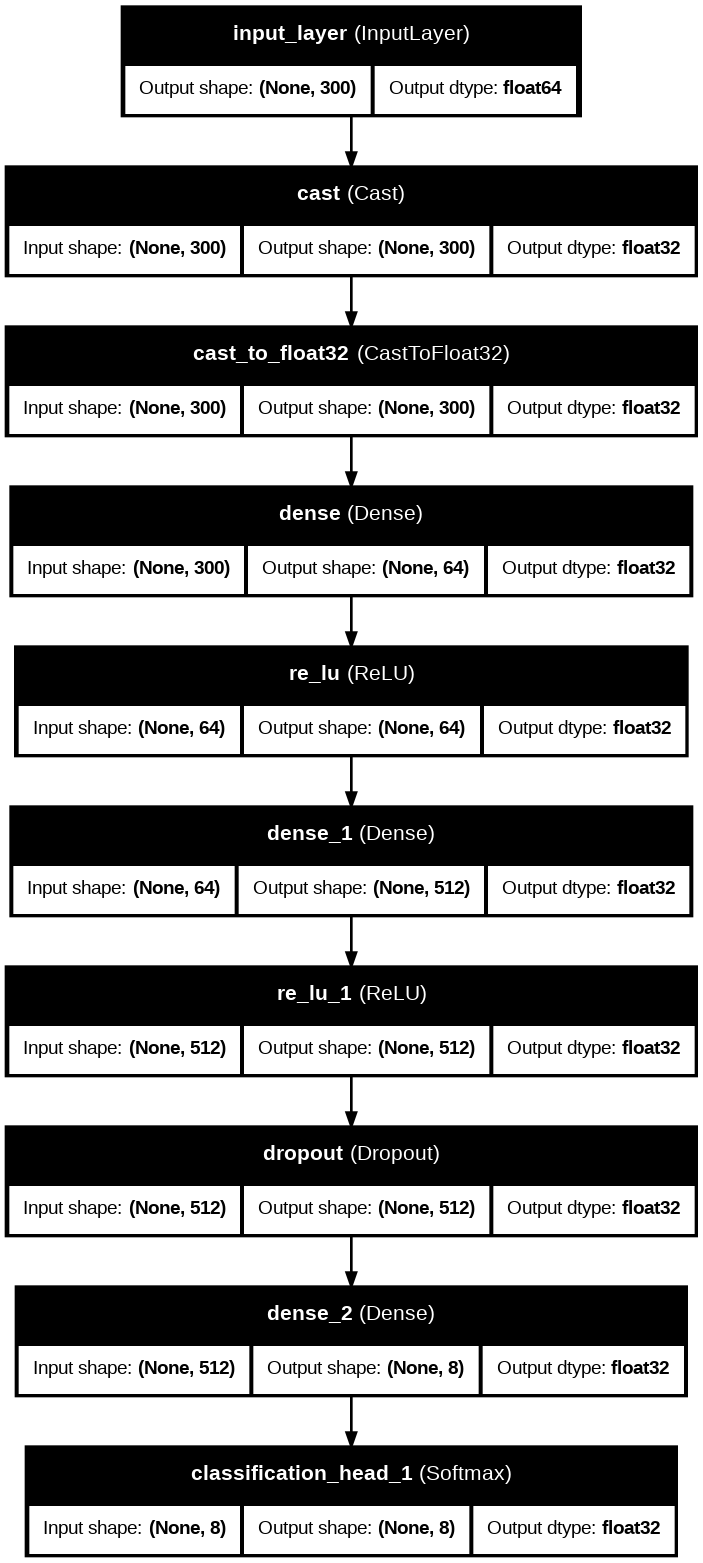

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
)

In [ ]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        print(f"Layer Name: {layer.name}, Number of Neurons: {layer.units}")

Layer Name: dense, Number of Neurons: 64
Layer Name: dense_1, Number of Neurons: 512
Layer Name: dense_2, Number of Neurons: 8


In [ ]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f"Layer: {layer.name}, Dropout Rate: {layer.rate}")

Layer: dropout, Dropout Rate: 0.5


In [ ]:
# Retrieve the optimizer
optimizer = model.optimizer
optimizer_name = optimizer.__class__.__name__


In [ ]:
learning_rate = optimizer.learning_rate
if isinstance(learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
    initial_learning_rate = learning_rate.initial_learning_rate.numpy()
else:
    initial_learning_rate = learning_rate.numpy()

In [ ]:
print(f"Optimizer: {optimizer_name}")
print(f"Learning Rate: {initial_learning_rate}")

Optimizer: Adam
Learning Rate: 0.0010000000474974513
